# **Analysis of Two Samples**
## Sections 3.2-3.3


Welcome to the 6th lecture in IntroStat

During the lectures we will present both slides and notebooks. 

This is the notebook used in the lecture in week 6.

---


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm

Vi vil ofte gerne vide om der er (”signifikant”) forskel på to forskellige
ting/grupper/interventioner.

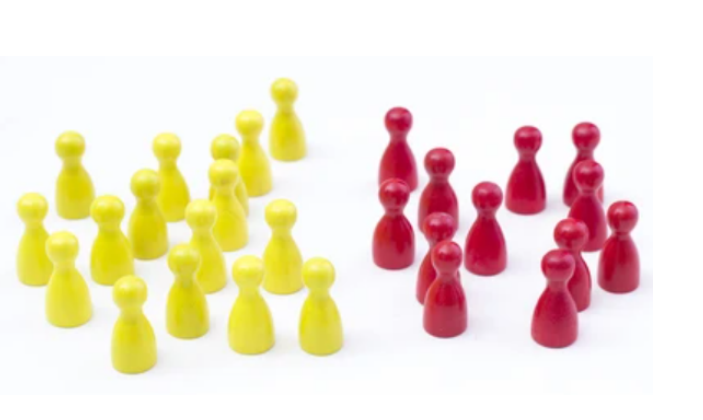

###  **Example** Nutrition study 1

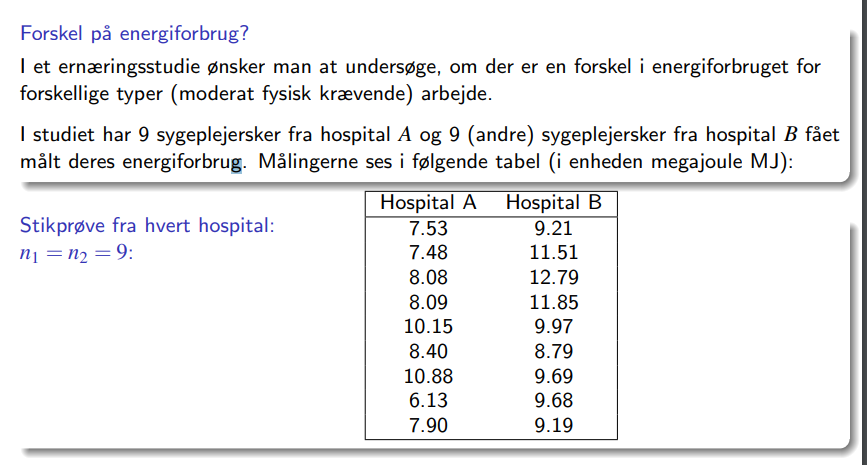

First visualise the data :)

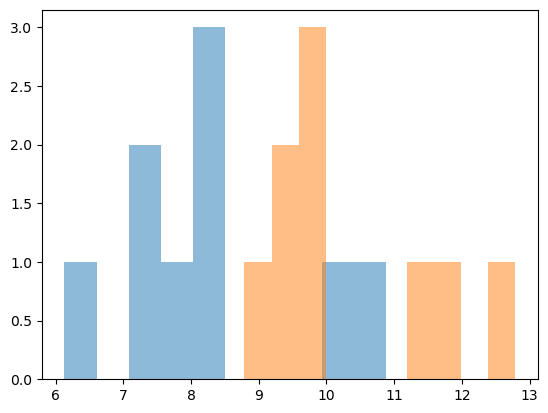

In [2]:
# Enter data
A = np.array([7.53, 7.48, 8.08, 8.09, 10.15, 8.40, 10.88, 6.13, 7.90])
B = np.array([9.21, 11.51, 12.79, 11.85, 9.97, 8.79, 9.69, 9.68, 9.19])

plt.hist(A, alpha=0.5)
plt.hist(B, alpha=0.5)
plt.show()

Lets calculate mean and sample standard deviation for each group

In [44]:
mean_A = A.mean()
mean_B = B.mean()
print([mean_A, mean_B])

s_A = A.std(ddof=1)
s_B = B.std(ddof=1)
print([s_A, s_B])

[8.293333333333335, 10.297777777777776]
[1.4280756282494287, 1.3978713976773558]


We can plot the mean values as well

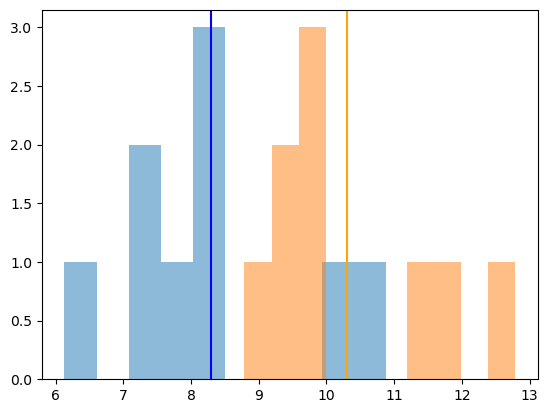

In [4]:
plt.hist(A, alpha=0.5)
plt.hist(B, alpha=0.5)
plt.axvline(mean_A, linestyle='-', color="blue", ymin=0, ymax=1)
plt.axvline(mean_B, linestyle='-', color="orange", ymin=0, ymax=1)

plt.show()

Great!
But are they the same?

What else can we do?

lets calculate standard error (se) for each group mean and add the confidence intervals 

In [5]:
n_A = len(A) 
n_B = len(B)
se_A = s_A/np.sqrt(n_A) # se = standard error
se_B = s_B/np.sqrt(n_B)
print([se_A, se_B])

[0.47602520941647625, 0.4659571325591186]


In [46]:
# Need to choose alpha - we choose alpha = 0.05 
t_0975 = stats.t.ppf(0.975, df=n_A-1) # same for B since n_A = n_B
print(t_0975)
CI_A = [mean_A - t_0975 * se_A, mean_A + t_0975 * se_A] #firkantede parenteser betyder man printer to værdier
CI_B = [mean_B - t_0975 * se_B, mean_B + t_0975 * se_B]
print(CI_A)
print(CI_B)

# or like we do normal
(CI_low,CI_high) = stats.ttest_1samp(A, popmean=0).confidence_interval(confidence_level=0.95)
print(CI_low,CI_high)
(CI_low,CI_high) = stats.ttest_1samp(B, popmean=0).confidence_interval(confidence_level=0.95)
print(CI_low,CI_high)

2.306004135204166
[7.195617231957511, 9.391049434709158]
[9.223278703268573, 11.37227685228698]
7.195617231957511 9.391049434709158
9.223278703268573 11.37227685228698


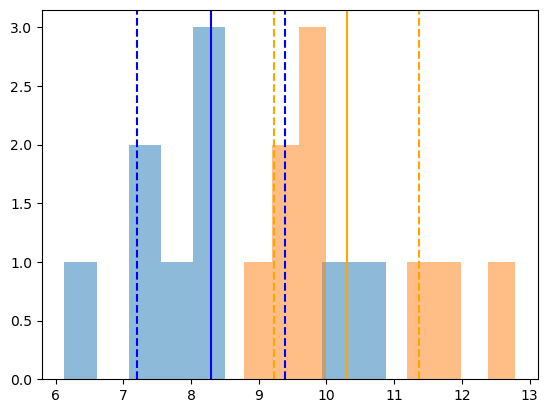

In [7]:
plt.hist(A, alpha=0.5)
plt.hist(B, alpha=0.5)
plt.axvline(mean_A, linestyle='-', color="blue", ymin=0, ymax=1)
plt.axvline(mean_B, linestyle='-', color="orange", ymin=0, ymax=1)
plt.axvline(CI_A[0], linestyle='--', color="blue", ymin=0, ymax=1)
plt.axvline(CI_A[1], linestyle='--', color="blue", ymin=0, ymax=1)
plt.axvline(CI_B[0], linestyle='--', color="orange", ymin=0, ymax=1)
plt.axvline(CI_B[1], linestyle='--', color="orange", ymin=0, ymax=1)

plt.show()

Another typical way to plot (only mean and CI):

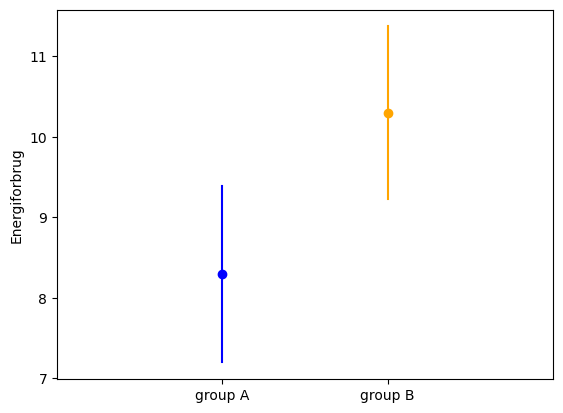

In [8]:
plt.plot([1], mean_A, 'o', color="blue")
plt.plot([2], mean_B, 'o', color="orange")
plt.plot([1,1], CI_A, linestyle='-', color="blue")
plt.plot([2,2], CI_B, linestyle='-', color="orange")
plt.xlim([0,3])
plt.xticks([1,2], ["group A", "group B"])
plt.ylabel('Energiforbrug')

plt.show()



---

# **Test med to stikprøver**

#### **Hvad er nulhypotesen? Hvordan ville man formulere den?**

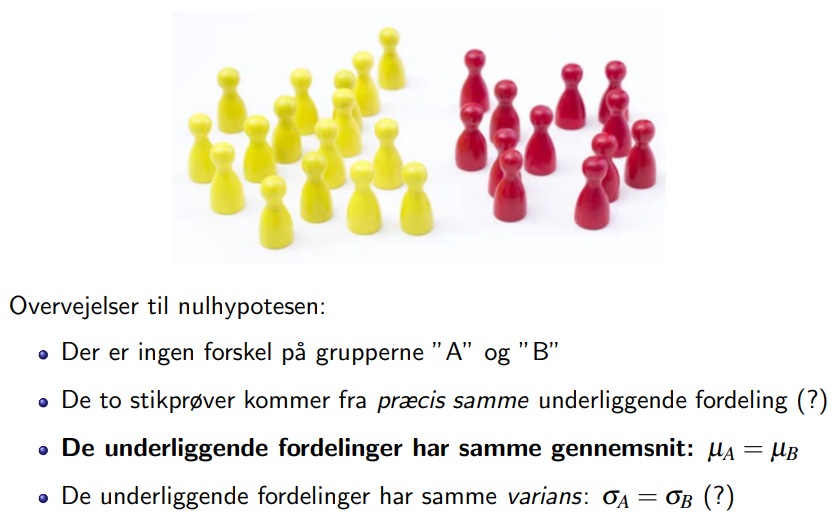
 * Så test om de to fordelinger har samme gennemsnit


**Hypotesetest:** $ H_0: \mu_1 = \mu_2$

### **For eksemplet fra før:**

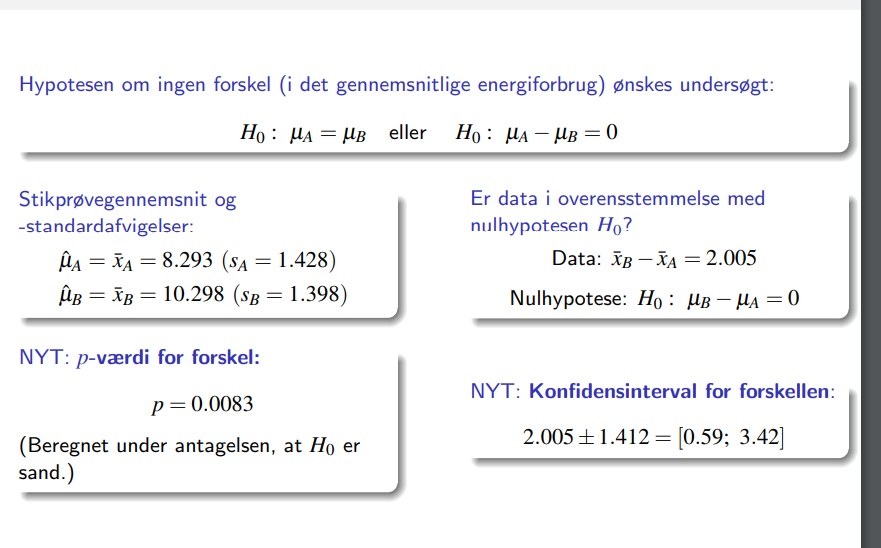

 ### **Forskel mellem to gennemsnit:**

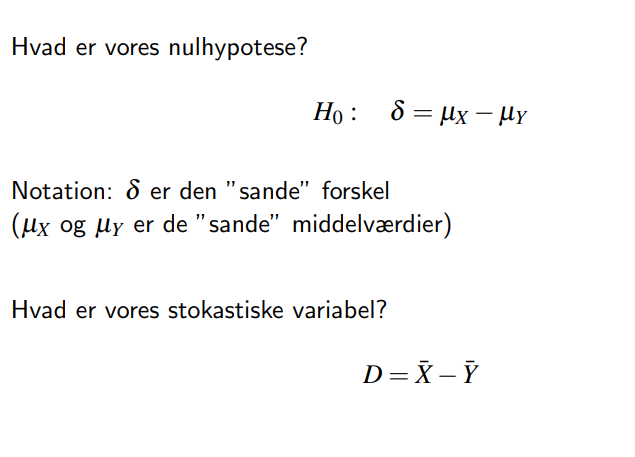

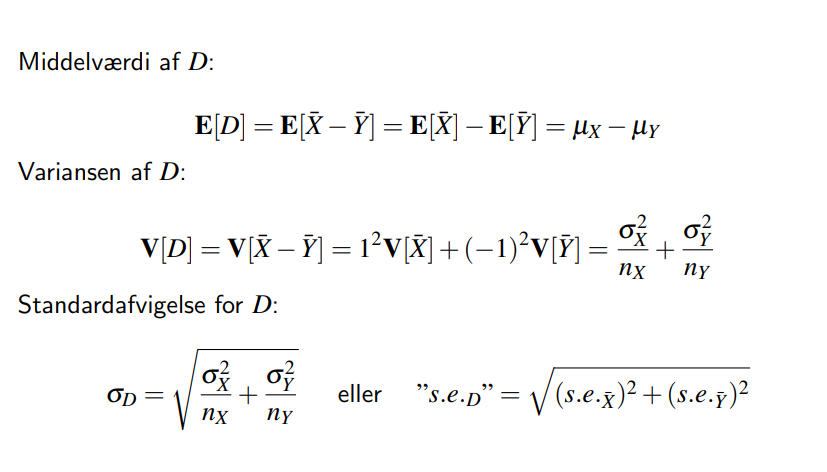

### **Notation:**

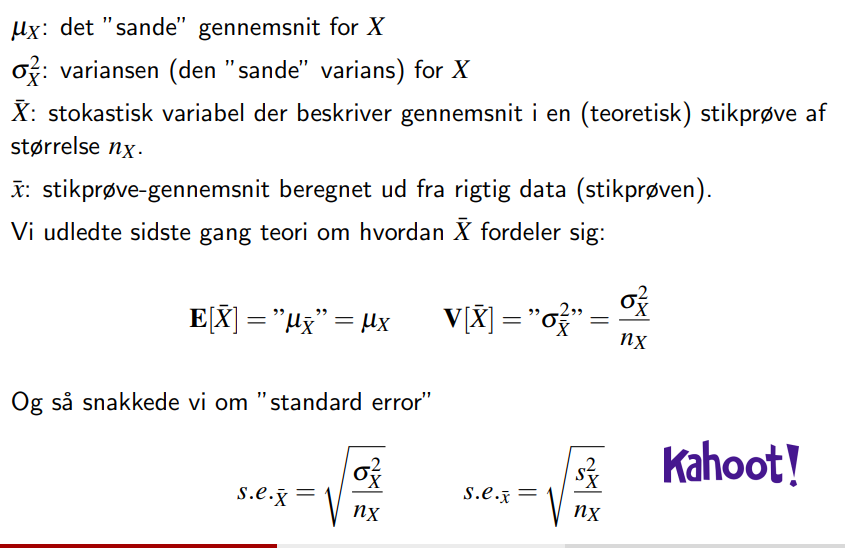

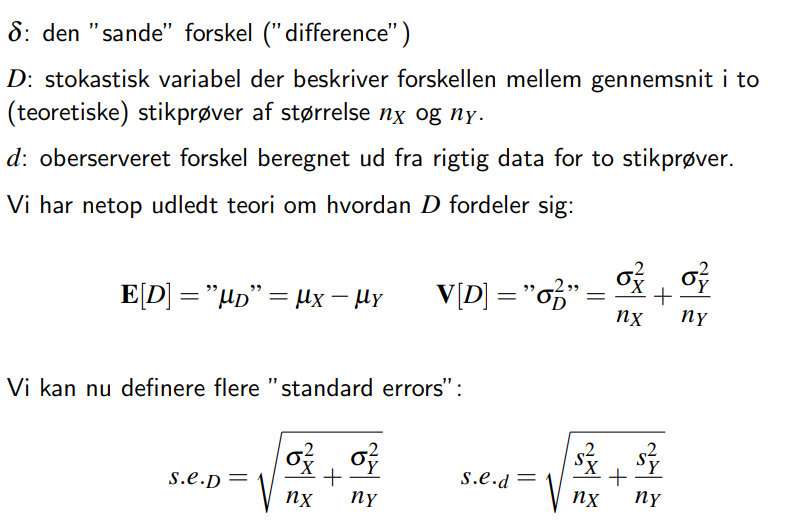

---

## **Teststørrelsen i en (Welch) t-test med to uparrede stikprøver:** Tester kun om gennemsnittene er ens

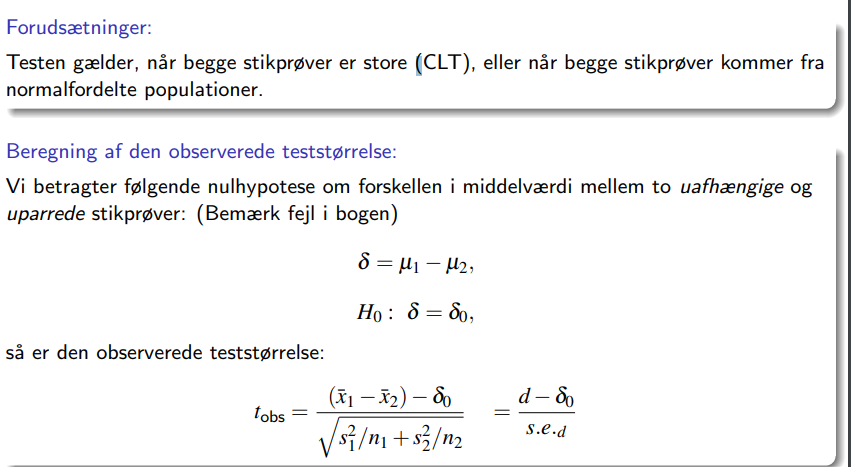

### **Fordeling af størrelsen:**

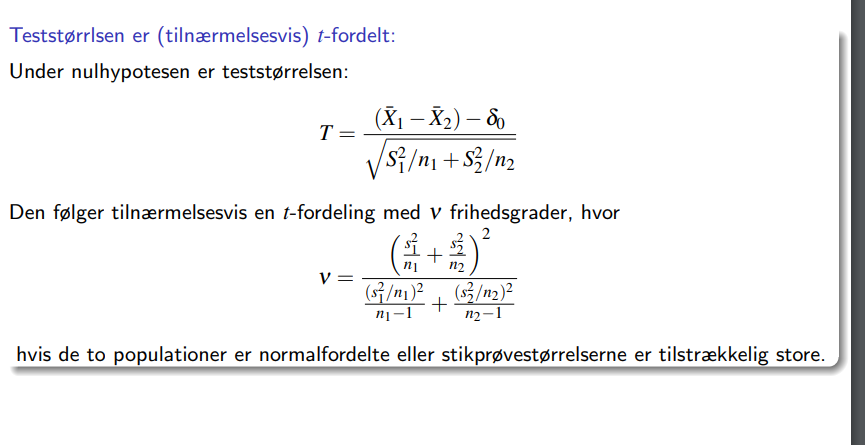

### **Metode:**
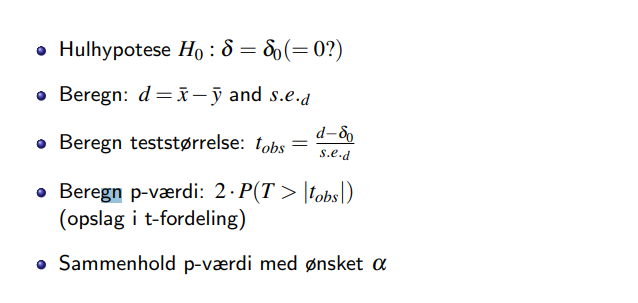


### Example: Nutrition study 2:

In [9]:
diff = mean_B - mean_A
print(diff)

2.0044444444444416


In [10]:
se_diff = np.sqrt(se_A**2 + se_B**2)
print(se_diff)

0.6661201463570338


In [11]:
# Define the null hypothesis
mean_null_hyp = 0

In [12]:
# Compute the "test statistic" from the oberserved data
tobs = (diff - mean_null_hyp) / se_diff
print(tobs)

3.009133495521211


In [13]:
# compute v (degrees of freedaom for difference-test)
v = (se_A**2 + se_B**2)**2 / (se_A**4/(n_A-1) + se_B**4/(n_B-1))
print(v)

15.992693827602638


In [14]:
# compare with t_0.975 from t-distribution with df = v. 0.975 fordi vi har et signifikans niveau på 5, 2,5 på begge sider
stats.t.ppf(0.975, df=v)

2.119984011855833

In [15]:
2*stats.t.cdf(-tobs, df=v)

0.008322739957316144

#### **Meget nemmere at gøre!:**

In [16]:
# You can also use the ttest_ind function from scipy.stats:
# "_ind" is for independent - i.e., two independent samples
test = stats.ttest_ind(B,A,equal_var=False) 
# "equal_var=False" means we are NOT assuming equal variances - this is a "Welch t-test"
print(test)

TtestResult(statistic=3.009133495521211, pvalue=0.00832273995731614, df=15.992693827602634)


Since 0.001 < p < 0.01 we conclude there is "Strong evidence against H_0"

We reject the nullhypothesis

And we conclude that **the average energy usage of nurses in Hospital B is significantly larger than in Hospital A.**

---


# **Konfidensintervallet for differensen $ \mu_1 - \mu_2$**

### **Metode:**

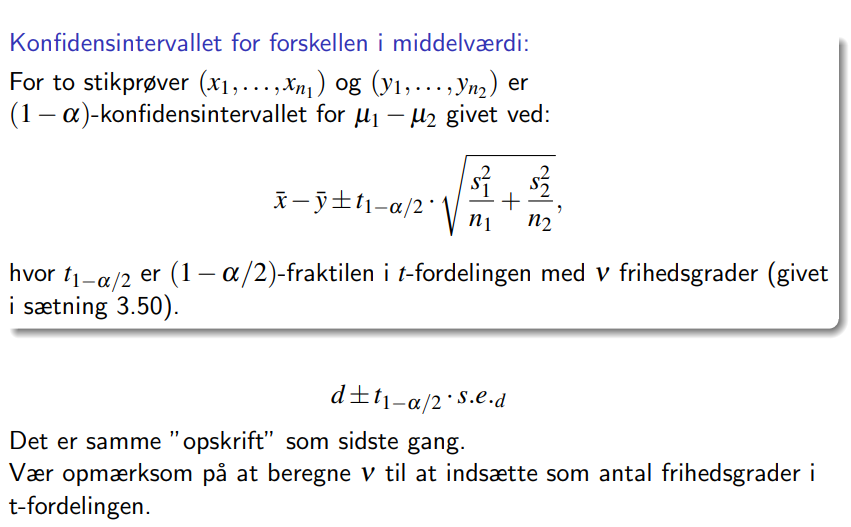

### Example: Nutrition study 3:

In [17]:
# Husk at V er:

# compute v (degrees of freedaom for difference-test)
v = (se_A**2 + se_B**2)**2 / (se_A**4/(n_A-1) + se_B**4/(n_B-1)) # se is standard error
print(v)

15.992693827602638


Confidence interval:

In [18]:
diff_lower = diff - stats.t.ppf(0.975, df=v)*se_diff
diff_upper = diff + stats.t.ppf(0.975, df=v)*se_diff
print([diff_lower,diff_upper])

[0.5922803841924627, 3.4166085046964207]


In [47]:
# You can also retrieve the confidence interval from the "test" calculated with stats.ttest_ind:
test = stats.ttest_ind(B,A,equal_var=False) 
print(test)
print(test.confidence_interval(0.95))

TtestResult(statistic=3.009133495521211, pvalue=0.00832273995731614, df=15.992693827602634)
ConfidenceInterval(low=0.5922803841924627, high=3.4166085046964207)


The confidence interval does not include the value 0.

---


# **Overlappende konfidensintervaller**

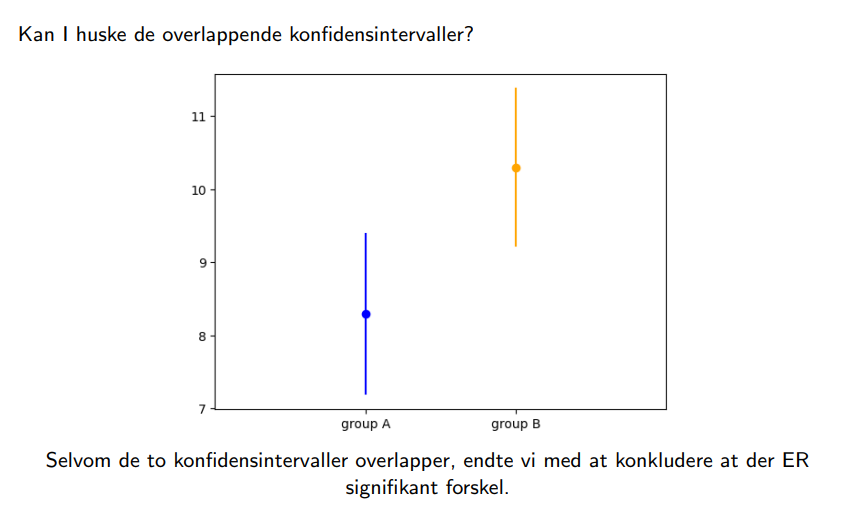


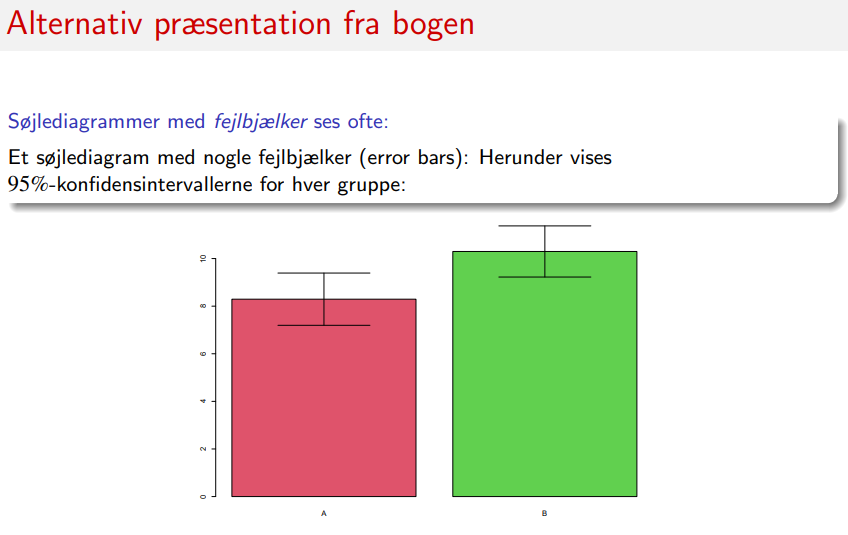

#### **Vær varsom med at bruge ”overlappende konfidensintervaller:**

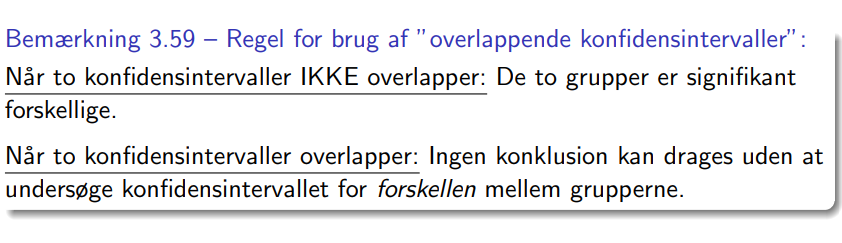

---

# **t-test med to parrede stikprøver (parret t-test)**

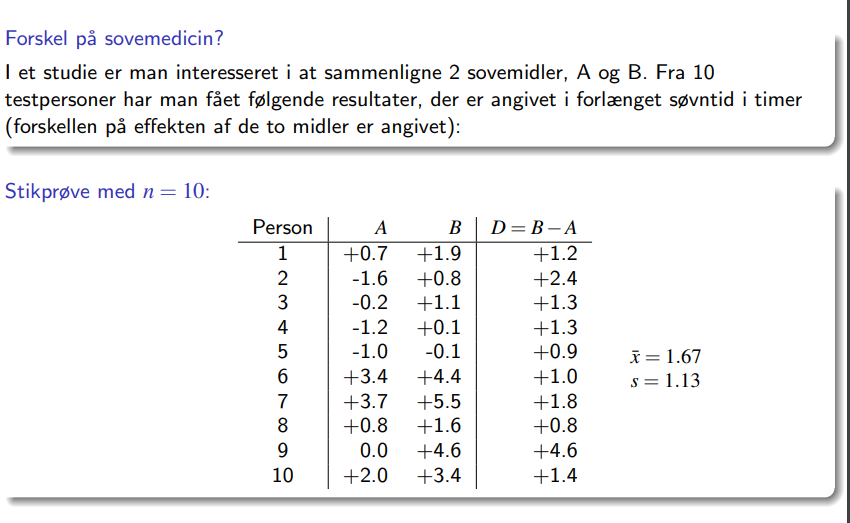

In [20]:
A = np.array([.7,-1.6,-.2,-1.2,-1,3.4,3.7,.8,0,2])
B = np.array([1.9,.8,1.1,.1,-.1,4.4,5.5,1.6,4.6,3.4])

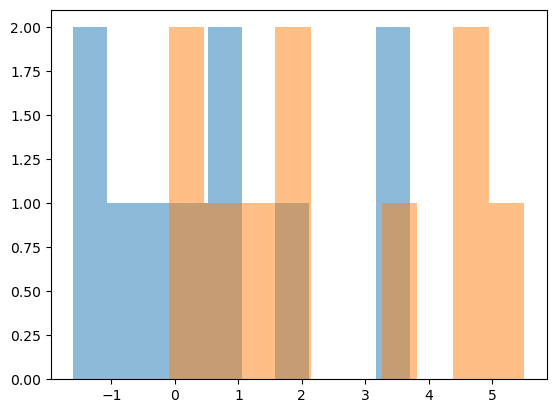

In [21]:
plt.hist(A, alpha=0.5)
plt.hist(B, alpha=0.5)
plt.show()

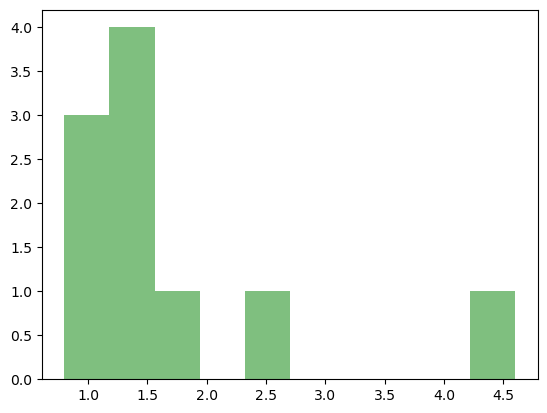

In [22]:
differences = B-A
plt.hist(differences, alpha=0.5, color = "green")
plt.show()

In [23]:
# make a "one sample t-test" for the differences (this time we only use the built-in python function):
test1 = stats.ttest_1samp(differences, popmean=0) #husk popmean er nulhypotese
print(test1)
print(test1.confidence_interval(0.95))

TtestResult(statistic=4.671645978656774, pvalue=0.0011658764685528319, df=9)
ConfidenceInterval(low=0.8613337442036719, high=2.4786662557963277)


In [24]:
# equal to a paired t-test for two samples:
test2 = stats.ttest_rel(B, A) # "_rel" is for related samples (= paired samples)
print(test2)
print(test2.confidence_interval(0.95))

TtestResult(statistic=4.671645978656774, pvalue=0.0011658764685528319, df=9)
ConfidenceInterval(low=0.8613337442036719, high=2.4786662557963277)


#### **Wrong analysis:**

In [25]:
# WRONG ANALYSIS:
test3 = stats.ttest_ind(B, A) # making independent 2 sample test - WRONG!
print(test3)
print(test3.confidence_interval(0.95))

TtestResult(statistic=1.9334408348617205, pvalue=0.06906688754589858, df=18.0)
ConfidenceInterval(low=-0.1446610663953074, high=3.484661066395306)


A paired experiment is "stronger" than an unpaired experiment. 

In a paired experiment each person is its owm "negative control" and we are sure to meassure a difference that is not due to inter-personal variation. 

---

# **Normalfordelingsantagelserne**

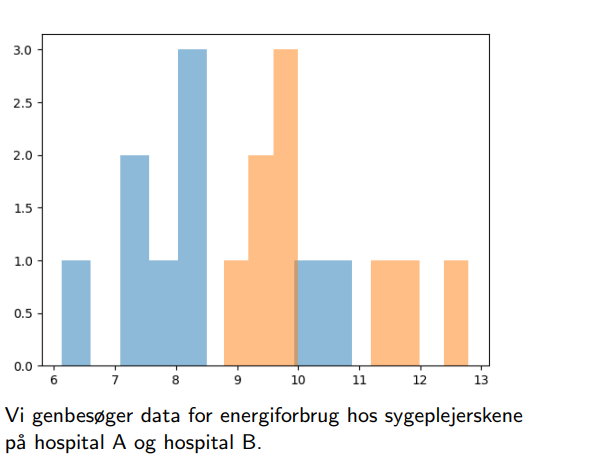



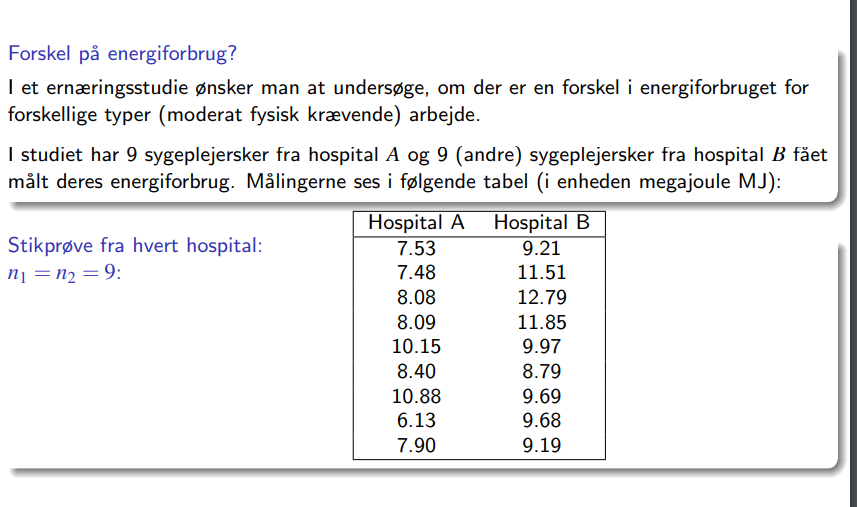

### QQ-plots

Lets re-visit the example with energy usage amongst nurses in hospital A and hospital B

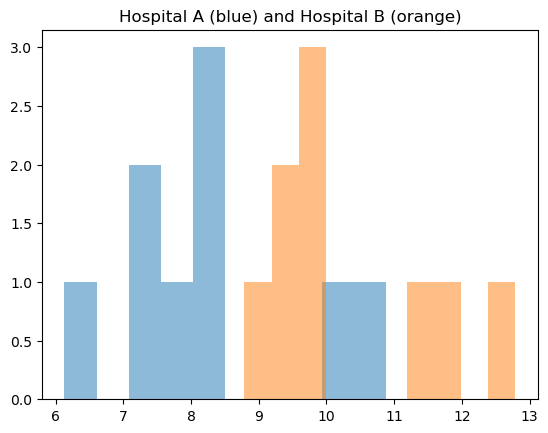

In [26]:
A = np.array([7.53, 7.48, 8.08, 8.09, 10.15, 8.40, 10.88, 6.13, 7.90])
B = np.array([9.21, 11.51, 12.79, 11.85, 9.97, 8.79, 9.69, 9.68, 9.19])

plt.hist(A, alpha=0.5)
plt.hist(B, alpha=0.5)
plt.title("Hospital A (blue) and Hospital B (orange)")
plt.show()

Could the data some from underlying normal distributions?

Do we need to assume that the distributions are normal?

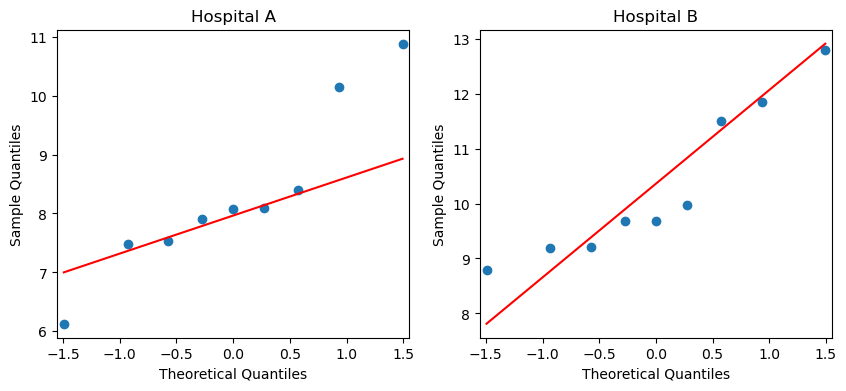

In [27]:
# Lets make the QQ-plots:
fig, axs = plt.subplots(1, 2, figsize=(10,4))
sm.qqplot(A,line="q",a=3/8,ax=axs[0]) 
sm.qqplot(B,line="q",a=3/8,ax=axs[1]) 
# OBS: "a = 3/8" is preferred for n <= 10 
#     ("a = 1/2" is preferred for n >  10)  
axs[0].set_title("Hospital A")
axs[1].set_title("Hospital B")
plt.show()


Its difficult to tell whether it looks normal

We can try to compare with simulated data from normal distributions

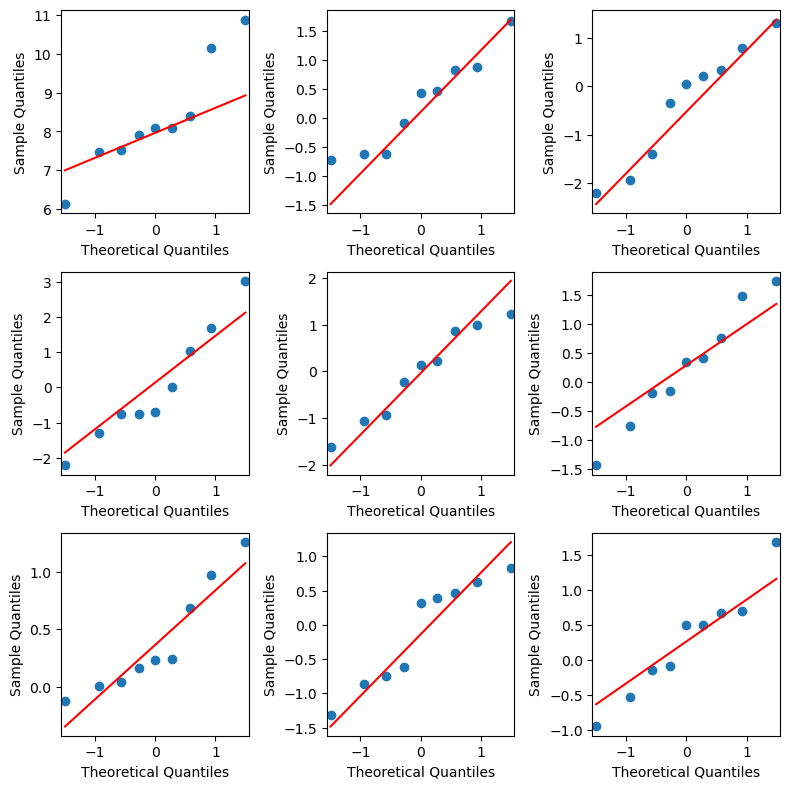

In [28]:
# for Hospital A
fig, axs = plt.subplots(3, 3, figsize=(8,8))
# data in first subplot:
sm.qqplot(A,line="q",a=3/8,ax=axs[0,0]) 
# simulated data in all other subplots:
sm.qqplot(stats.norm.rvs(size=len(A)),line="q",a=3/8,ax=axs[0,1]) 
sm.qqplot(stats.norm.rvs(size=len(A)),line="q",a=3/8,ax=axs[0,2]) 
sm.qqplot(stats.norm.rvs(size=len(A)),line="q",a=3/8,ax=axs[1,0]) 
sm.qqplot(stats.norm.rvs(size=len(A)),line="q",a=3/8,ax=axs[1,1]) 
sm.qqplot(stats.norm.rvs(size=len(A)),line="q",a=3/8,ax=axs[1,2]) 
sm.qqplot(stats.norm.rvs(size=len(A)),line="q",a=3/8,ax=axs[2,0]) 
sm.qqplot(stats.norm.rvs(size=len(A)),line="q",a=3/8,ax=axs[2,1]) 
sm.qqplot(stats.norm.rvs(size=len(A)),line="q",a=3/8,ax=axs[2,2]) 
plt.tight_layout()
plt.show()

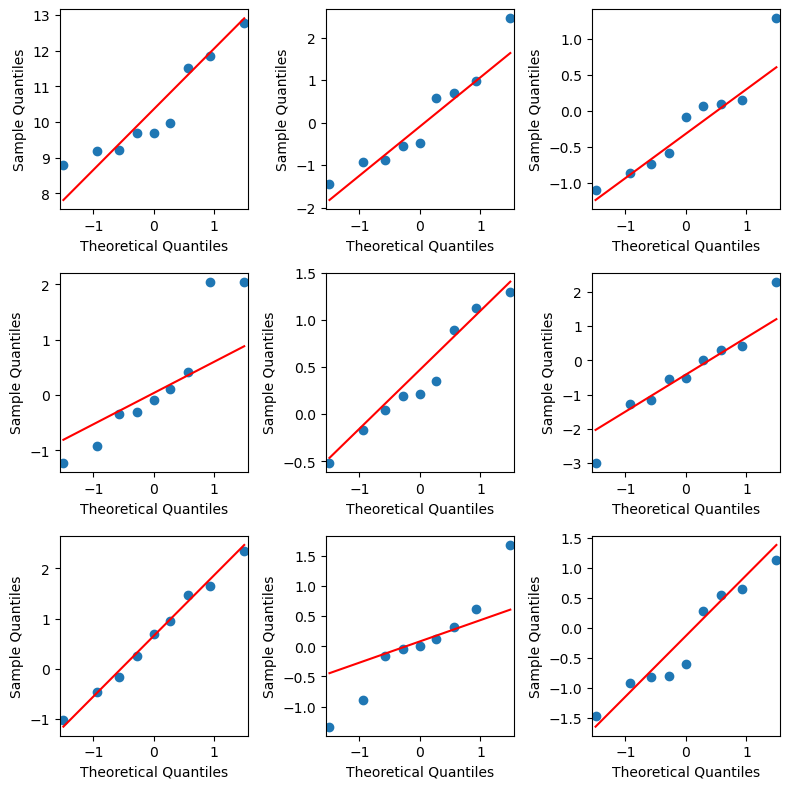

In [29]:
# for Hospital B
fig, axs = plt.subplots(3, 3, figsize=(8,8))
# data in first subplot:
sm.qqplot(B,line="q",a=3/8,ax=axs[0,0]) 
# simulated data in all other subplots:
sm.qqplot(stats.norm.rvs(size=len(B)),line="q",a=3/8,ax=axs[0,1]) 
sm.qqplot(stats.norm.rvs(size=len(B)),line="q",a=3/8,ax=axs[0,2]) 
sm.qqplot(stats.norm.rvs(size=len(B)),line="q",a=3/8,ax=axs[1,0]) 
sm.qqplot(stats.norm.rvs(size=len(B)),line="q",a=3/8,ax=axs[1,1]) 
sm.qqplot(stats.norm.rvs(size=len(B)),line="q",a=3/8,ax=axs[1,2]) 
sm.qqplot(stats.norm.rvs(size=len(B)),line="q",a=3/8,ax=axs[2,0]) 
sm.qqplot(stats.norm.rvs(size=len(B)),line="q",a=3/8,ax=axs[2,1]) 
sm.qqplot(stats.norm.rvs(size=len(B)),line="q",a=3/8,ax=axs[2,2]) 
plt.tight_layout()
plt.show()

When comparing to simulated data, it looks like our data could very well come from an underlying normal distribution.

This is no proof of normality(!), but it can give us an idea whether the assumption could be true.

---

# **Styrke og stikprøvestørrelse - Forsøgsdesign**

### **Eksempel:** Letbane

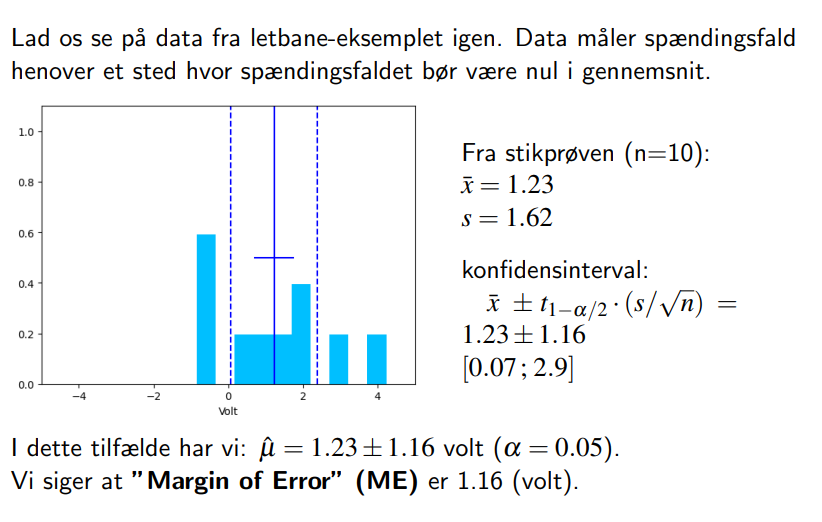

### **Margin of error:**

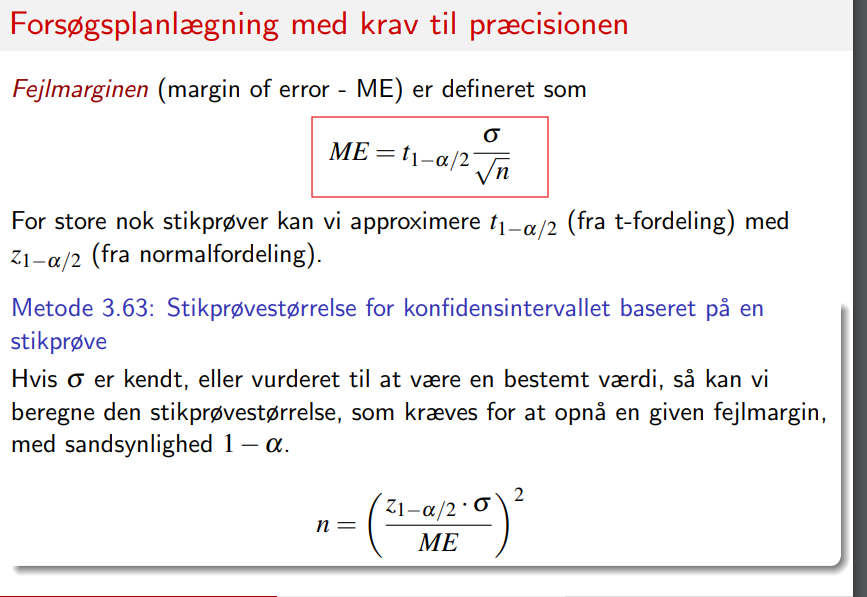

---

# **Styrke og stikprøvestørrelse)**

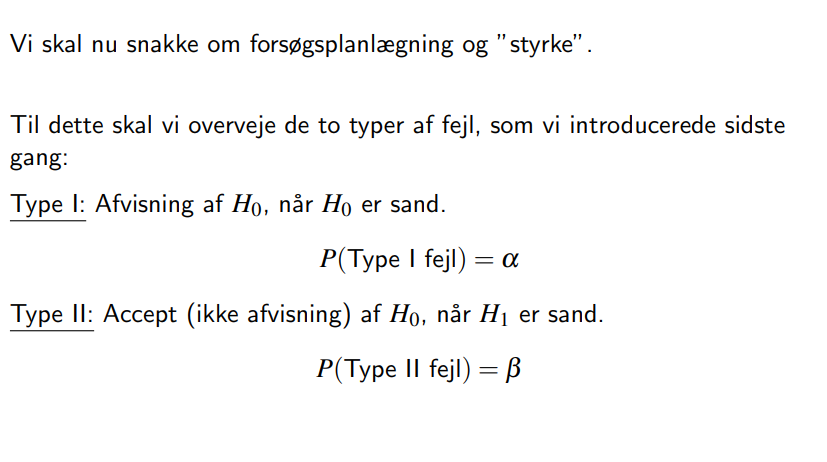

### **Eksempel: Letbane**

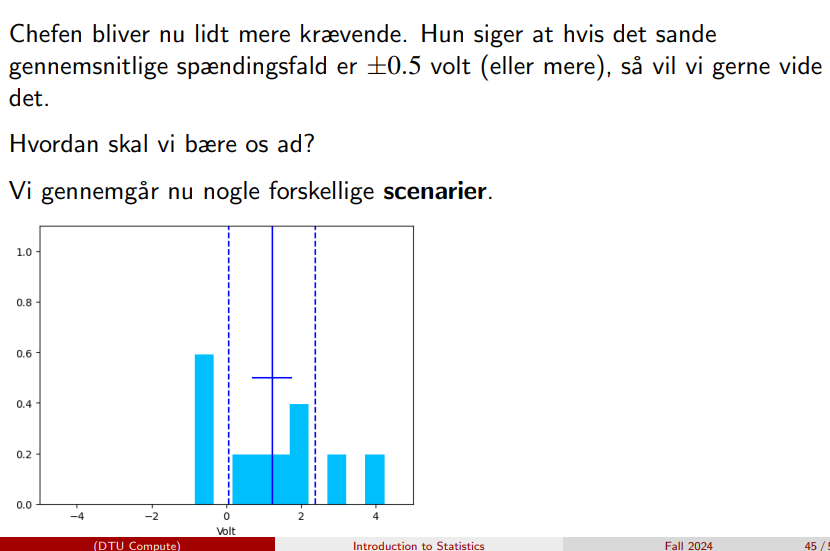

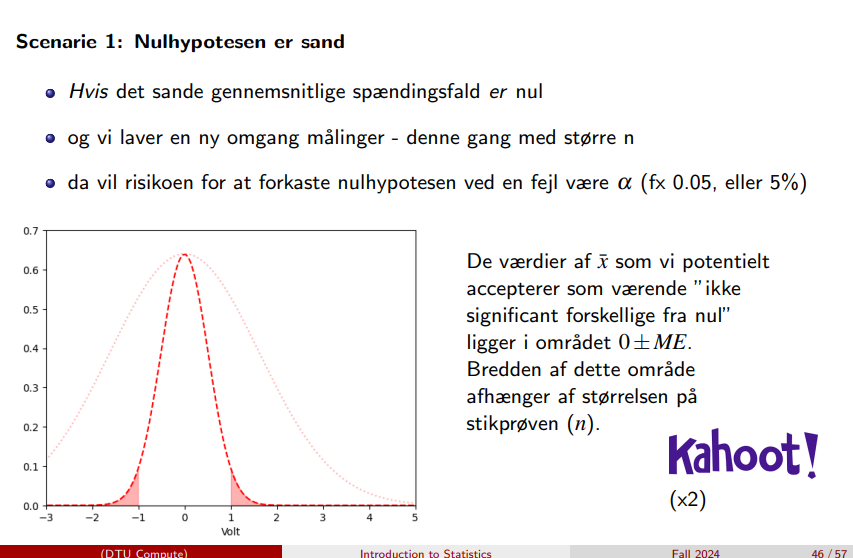

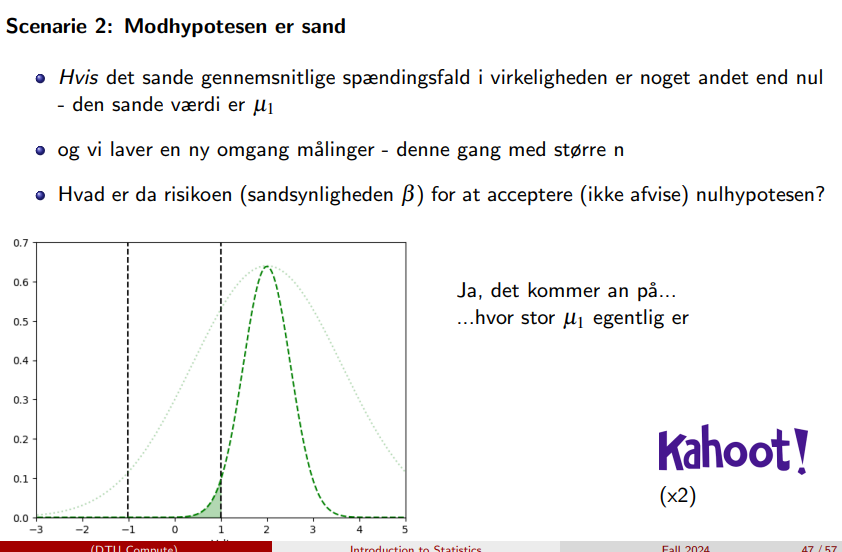

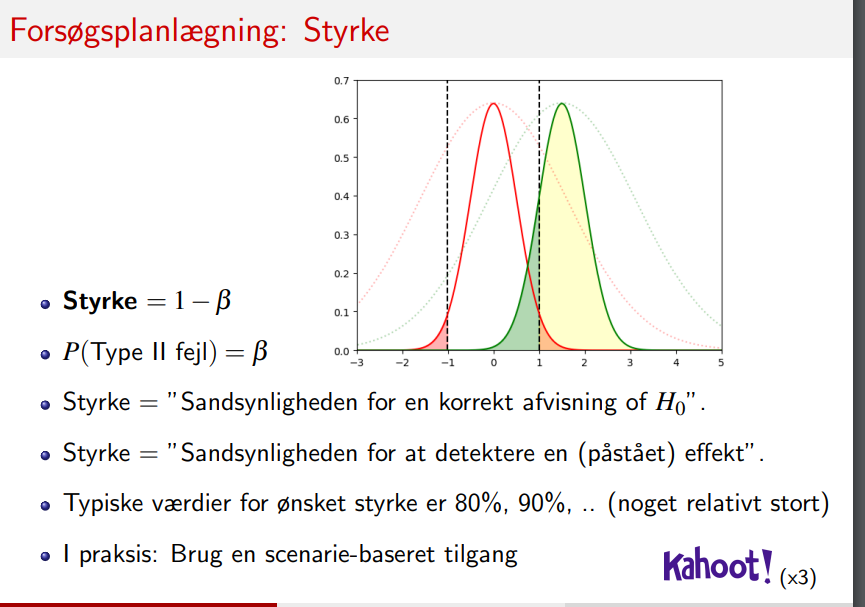

### Example: Power calculations

In [30]:
# import package for power calculations:
import statsmodels.stats.power as smp

In [31]:
# We want to calculate the sample size needed in a new experiment

# from previous experiments we have a good guess for the sample variation:
sd = 1.62

# we want to be able to detect a voltage drop of down to 0.5 volts
delta = 0.5

# we need some fractals from the normal distribution (assuming the samples will be big enough for normal distribution assumption to apply)
z_power = stats.norm.ppf(0.80, loc=0, scale = 1)
z_signif = stats.norm.ppf(0.975, loc=0, scale = 1)

# use formula to calculate n_obs (needed number of observations):
n_obs = (sd/delta*(z_power+z_signif))**2
print(n_obs)

82.394399899303


In [32]:
# we can also use the python function TTestPower().solve_power (for one sample power calculations): 
print(smp.TTestPower().solve_power(effect_size=delta/sd, alpha=0.05, power=0.80))

84.33509229986839


The results is almost the same (due to assumption anout normaldistribution)

In [33]:
# What if we can only make 60 observations?
n = 60

# calculate the power:
z_power_new = np.sqrt(n*(delta/sd)**2)-z_signif
print(z_power_new)

power = stats.norm.cdf(z_power_new)
print(power)

0.43076647608180796
0.6666809112171673


In [34]:
# we can also use the python function TTestPower().solve_power (for one sample power calculations): 
print(smp.TTestPower().solve_power(effect_size=delta/sd, alpha=0.05, nobs=60))

0.6523725330696485


The result is almost the same (due to assumption anout normaldistribution)

### Example: Power calculations, 2 samples

1)

Find the sample size in a test where:

power = 0.90 (beta = 0.10)

n1 = n2 (k = 1)

We want to be able to detect a difference of 2

using alpha = 0.05

and assuming sigma = 1 in both populations

In [35]:
power = 0.90
k = 1
delta = 2
sd = 1

z_power = stats.norm.ppf(0.90, loc=0, scale = 1)
z_signif = stats.norm.ppf(0.975, loc=0, scale = 1)

n1 = (k+1) * (sd/delta*(z_signif+z_power))**2

print(n1)

5.2537115307203095


In [36]:
# we can also use the python function TTestIndPower().solve_power (for one sample power calculations): 
print(smp.TTestIndPower().solve_power(effect_size=delta/sd, alpha=0.05, power=0.90, ratio=k))

6.386755384175011


The result is almost the same (due to assumption anout normaldistribution)

2)

Find the power of an experiment where: 

n1 = n2 = 10  (k = 1)

We want to be able to detect a difference of 2

using alpha = 0.05

and assuming sigma = 1 in both populations

In [37]:
n1 = 10
n2 = 10
k = 1
delta = 2
sd = 1
z_signif = stats.norm.ppf(0.975, loc=0, scale = 1)

z = np.sqrt(n1/(k+1)*delta**2/sd**2) - z_signif
power = stats.norm.cdf(z)

print(power)

0.9940004699860238


In [38]:
# we can also use the python function TTestIndPower().solve_power (for one sample power calculations): 
print(smp.TTestIndPower().solve_power(effect_size=delta/sd, alpha=0.05, nobs1=10, ratio=k))

0.9881789691948746


The result is almost the same (due to assumption anout normaldistribution)

3)

What effectsize (delta) can be detected when:

n1 = n2 = 10  (k = 1)

alpha = 0.05

power = 0.90 (beta = 0.10)

and assuming sigma = 1 in both populations

In [39]:
n1 = 10
n2 = 10
k = 1
sd = 1

z_power = stats.norm.ppf(0.90, loc=0, scale = 1)
z_signif = stats.norm.ppf(0.975, loc=0, scale = 1)

delta = sd*(z_signif+z_power)/np.sqrt(n1/(k+1))

print(delta)

1.4496498240223823


In [40]:
# we can also use the python function TTestIndPower().solve_power (for one sample power calculations): 
print(smp.TTestIndPower().solve_power(alpha=0.05, power=0.90, nobs1=10, ratio=k))

1.5336931237722076
